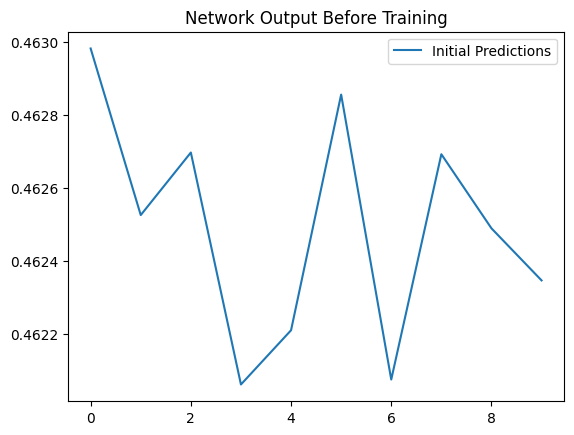

In [2]:
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3, 5)
        self.fc2 = nn.Linear(5, 4)
        self.fc3 = nn.Linear(4, 2)
        self.output = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = torch.tanh(self.output(x))
        return x

model = SimpleNN()
input_data = torch.rand(10, 3)
initial_predictions = model(input_data).detach().numpy()
sns.lineplot(data=initial_predictions.flatten(), label="Initial Predictions")
plt.title("Network Output Before Training")
plt.show()


In [3]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [4]:
target_data = torch.rand(10, 1)
epochs = 100
for epoch in range(epochs):
    predictions = model(input_data)
    loss = loss_fn(predictions, target_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')


Epoch 1/100, Loss: 0.0592
Epoch 2/100, Loss: 0.0592
Epoch 3/100, Loss: 0.0592
Epoch 4/100, Loss: 0.0592
Epoch 5/100, Loss: 0.0591
Epoch 6/100, Loss: 0.0591
Epoch 7/100, Loss: 0.0591
Epoch 8/100, Loss: 0.0591
Epoch 9/100, Loss: 0.0591
Epoch 10/100, Loss: 0.0591
Epoch 11/100, Loss: 0.0591
Epoch 12/100, Loss: 0.0591
Epoch 13/100, Loss: 0.0590
Epoch 14/100, Loss: 0.0590
Epoch 15/100, Loss: 0.0590
Epoch 16/100, Loss: 0.0590
Epoch 17/100, Loss: 0.0590
Epoch 18/100, Loss: 0.0590
Epoch 19/100, Loss: 0.0590
Epoch 20/100, Loss: 0.0590
Epoch 21/100, Loss: 0.0590
Epoch 22/100, Loss: 0.0590
Epoch 23/100, Loss: 0.0590
Epoch 24/100, Loss: 0.0589
Epoch 25/100, Loss: 0.0589
Epoch 26/100, Loss: 0.0589
Epoch 27/100, Loss: 0.0589
Epoch 28/100, Loss: 0.0589
Epoch 29/100, Loss: 0.0589
Epoch 30/100, Loss: 0.0589
Epoch 31/100, Loss: 0.0589
Epoch 32/100, Loss: 0.0589
Epoch 33/100, Loss: 0.0589
Epoch 34/100, Loss: 0.0589
Epoch 35/100, Loss: 0.0589
Epoch 36/100, Loss: 0.0589
Epoch 37/100, Loss: 0.0589
Epoch 38/1

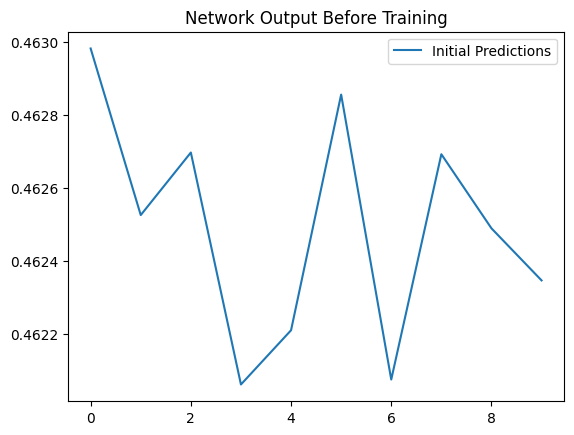

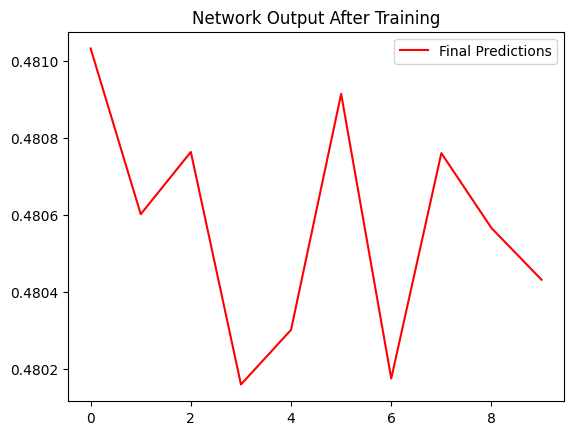

In [5]:
final_predictions = model(input_data).detach().numpy()
sns.lineplot(data=initial_predictions.flatten(), label="Initial Predictions")
plt.title("Network Output Before Training")
plt.show()
sns.lineplot(data=final_predictions.flatten(), label="Final Predictions", color='red')
plt.title("Network Output After Training")
plt.show()
